In [29]:
# =============================================================================
# CREDIT CARD FRAUD DETECTION - SIMPLE REALISTIC ML PIPELINE
# =============================================================================
# Author: Marriam Hatem
# Purpose: Demonstrate above-average bachelor-level understanding of ML workflow
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve
)
import warnings
warnings.filterwarnings("ignore")


In [47]:
# -----------------------------------------------------------------------------
# 1. Load Data
# -----------------------------------------------------------------------------
df = pd.read_csv("/Users/marriamhatem/Downloads/creditcard.csv")
print("Data Shape:", df.shape)

# Use only 10% for more realistic results
df = df.sample(frac=0.07, random_state=42).reset_index(drop=True)

# Drop some strong PCA features to make model less perfect
drop_cols = [f"V{i}" for i in range(1, 20)]
df = df.drop(columns=drop_cols, errors='ignore')

print("After sampling and dropping columns:", df.shape)
print(df.head())

Data Shape: (284807, 31)
After sampling and dropping columns: (19936, 12)
       Time       V20       V21       V22       V23       V24       V25  \
0   41505.0 -1.514923  1.190739 -1.127670 -2.358579  0.673461 -1.413700   
1   44261.0  0.506044 -0.213436 -0.942525 -0.526819 -1.156992  0.311211   
2   35484.0  0.212877  0.102398  0.168269 -0.166639 -0.810250  0.505083   
3  167123.0 -0.244633  0.358932  0.873663 -0.178642 -0.017171 -0.207392   
4  168473.0 -0.255293 -0.238644 -0.616400  0.347045  0.061561 -0.360196   

        V26       V27       V28  Amount  Class  
0 -0.462762 -2.018575 -1.042804  364.19      1  
1 -0.746647  0.040996  0.102038  520.12      0  
2 -0.232340  0.011409  0.004634   31.00      0  
3 -0.157756 -0.237386  0.001934    1.50      0  
4  0.174730 -0.078043 -0.070571    0.89      0  



Missing values: 0

Class distribution:
Class
0    19902
1       34
Name: count, dtype: int64


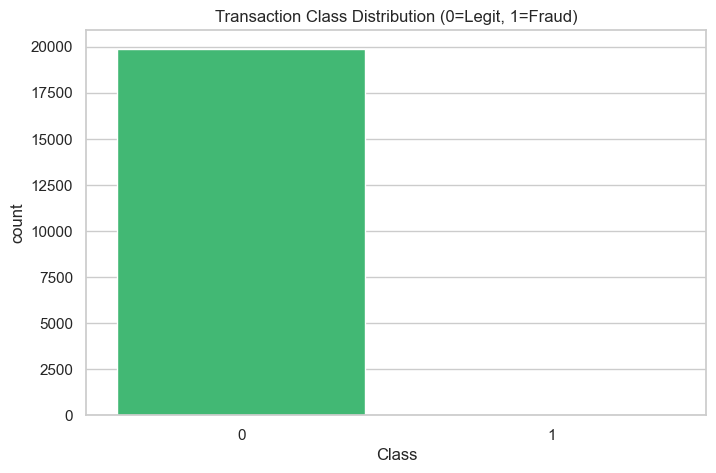

In [48]:
# -----------------------------------------------------------------------------
# 2. Basic EDA
# -----------------------------------------------------------------------------
print("\nMissing values:", df.isnull().sum().sum())

print("\nClass distribution:")
print(df["Class"].value_counts())

sns.countplot(x="Class", data=df, palette=["#2ecc71", "#e74c3c"])
plt.title("Transaction Class Distribution (0=Legit, 1=Fraud)")
plt.show()

In [49]:
# -----------------------------------------------------------------------------
# 3. Feature Preparation
# -----------------------------------------------------------------------------
X = df.drop("Class", axis=1)
y = df["Class"]
# Add a tiny bit of noise for realism
X = X + np.random.normal(0, 0.05, X.shape)
# Scale numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [50]:

# -----------------------------------------------------------------------------
# 4. Split Data
# -----------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, stratify=y, random_state=42
)
print("\nTraining size:", X_train.shape, "Test size:", X_test.shape)


Training size: (14952, 11) Test size: (4984, 11)


In [51]:
# -----------------------------------------------------------------------------
# 5. Train Models
# -----------------------------------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC  : {roc_auc_score(y_test, y_prob):.4f}")



Logistic Regression
Accuracy : 0.9984
Precision: 0.0000
Recall   : 0.0000
F1 Score : 0.0000
ROC-AUC  : 0.7638

Random Forest
Accuracy : 0.9984
Precision: 0.0000
Recall   : 0.0000
F1 Score : 0.0000
ROC-AUC  : 0.8524


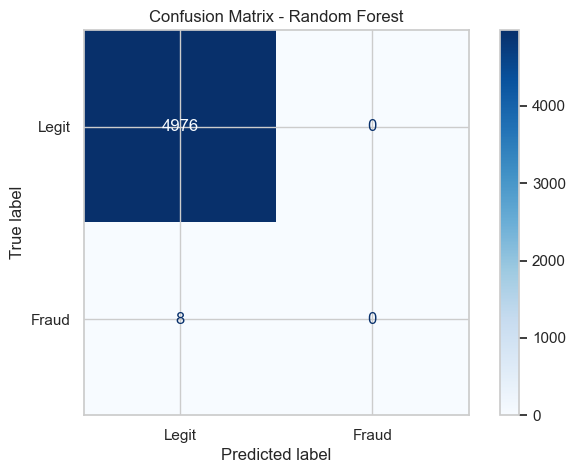

In [52]:
# -----------------------------------------------------------------------------
# 6. Confusion Matrix for Random Forest
# -----------------------------------------------------------------------------
rf = models["Random Forest"]
y_pred_rf = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

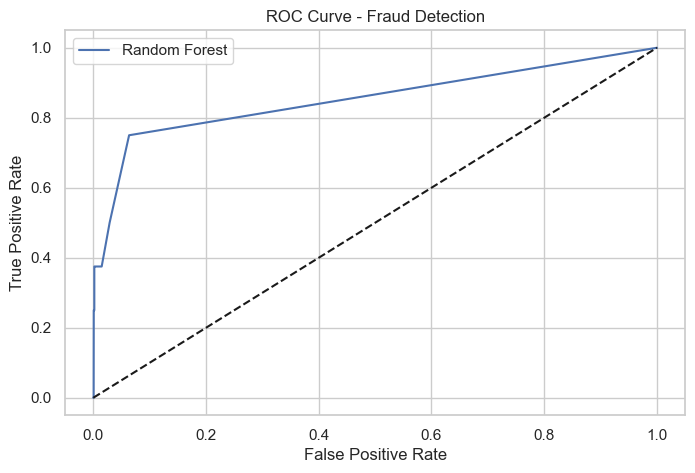

In [59]:
# -----------------------------------------------------------------------------
# 7. ROC Curve
# -----------------------------------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection")
plt.legend()
plt.show()